# Machine Learning Unsupervised

##  t-SNE manifold learning algorithm

__Goal:__
The purpose of this notebook is to learn how to use an unsupervised learning algorithm, **t-SNE** using sklearn.   

__At the end of this notebook you will be able to:__
> 1. Run a t-SNE algorithm.
> 2. Understand how you can configure the algorithm.
> 3. Know the advantages and disadvantages of the algorithm.

## Introduction
t-SNE [1] is a tool to visualize high-dimensional data. It converts
similarities between data points to joint probabilities and tries
to minimize the Kullback-Leibler divergence between the joint
probabilities of the low-dimensional embedding and the
high-dimensional data. t-SNE has a cost function that is not convex,
i.e. with different initializations we can get different results.

[1] van der Maaten, L.J.P.; Hinton, G.E. Visualizing High-Dimensional Data
    Using t-SNE. Journal of Machine Learning Research 9:2579-2605, 2008.
    Use Case for t-SNE

## Use case
t-SNE could be used on high-dimensional data and then the output of those dimensions then become inputs to some other classification model. t-SNE could be used for data exploration, to learn more about segments. t-SNE often show clear separation in the data. This can be used to select a cluster number or evaluating relations. t-SNE however is not a clustering approach since it does not preserve the inputs like PCA and the values may often change between runs so it’s purely for exploration [2]

https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1

In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
def plot_data(X, df):
    #add x, y features to the original df
    df['x'] = X[:,0]
    df['y'] = X[:,1]
    sns.scatterplot(x = 'x', y = 'y', hue = 'type', data = df, alpha = 0.5, palette=['red','blue'])
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.show()

## the data
The data used is liver data that contains gene expression data of healthy donor liver as well as tumor and paired non-tumor tissue of HCC patients.

CSV file containing the gene expression levels of 22277 genes (columns) from 357 samples (rows). There are 2 different types represented in this dataset (column "type"). More information about this dataset, as well as other file formats such as TAB and ARFF, data visualization, and classification and clustering benchmarks are freely available at the official CuMiDa website http://sbcb.inf.ufrgs.br/cumida

# Preprocessing the data

First we will load the data and check for missing data and distributions. Then we will prepare the feauture matrix X

In [3]:
df = pd.read_csv('../data/Liver_GSE14520_U133A.csv')

In [4]:
df.shape

(357, 22279)

In [5]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [6]:
set(df.type)

{'HCC', 'normal'}

In [7]:
len(df)

357

In [8]:
df['type'].value_counts()

HCC       181
normal    176
Name: type, dtype: int64

In [9]:
df.head()

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM362958.CEL.gz,HCC,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
1,GSM362959.CEL.gz,HCC,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
2,GSM362960.CEL.gz,HCC,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
3,GSM362964.CEL.gz,HCC,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
4,GSM362965.CEL.gz,HCC,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [10]:
df = df.set_index('samples')

In [11]:
data = df.select_dtypes(include=np.number)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, GSM362958.CEL.gz to GSM712541.CEL.gz
Columns: 22277 entries, 1007_s_at to AFFX-TrpnX-M_at
dtypes: float64(22277)
memory usage: 60.7+ MB


In [13]:
data.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
samples,,,,,,,,,,,,,,,,,,,,,
GSM362958.CEL.gz,6.801198,4.553189,6.787790,5.430893,3.250222,6.272688,3.413405,3.374910,3.654116,3.804983,...,10.735084,10.398843,12.298551,12.270505,3.855588,3.148321,3.366087,3.199008,3.160388,3.366417
GSM362959.CEL.gz,7.585956,4.193540,3.763183,6.003593,3.309387,6.291927,3.754777,3.587603,5.137159,8.622475,...,11.528447,11.369919,12.867048,12.560433,4.016561,3.282867,3.541994,3.548680,3.460083,3.423348
GSM362960.CEL.gz,7.803370,4.134075,3.433113,5.395057,3.476944,5.825713,3.505036,3.687333,4.515175,12.681439,...,10.892460,10.416151,12.356337,11.888482,3.839367,3.598851,3.516791,3.484089,3.282626,3.512024
GSM362964.CEL.gz,6.920840,4.000651,3.754500,5.645297,3.387530,6.470458,3.629249,3.577534,5.192624,11.759412,...,10.686871,10.524836,12.006596,11.846195,3.867602,3.180472,3.309547,3.425501,3.166613,3.377499
GSM362965.CEL.gz,6.556480,4.599010,4.066155,6.344537,3.372081,5.439280,3.762213,3.440714,4.961625,10.318552,...,11.014454,10.775566,12.657182,12.573076,4.091440,3.306729,3.493704,3.205771,3.378567,3.392938


In [14]:
data.describe()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,...,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,6.919697,4.364608,3.997815,5.676159,3.196624,5.944732,3.784451,3.535687,5.116819,10.975748,...,11.877943,11.655396,13.102149,12.969547,5.100523,3.625519,4.027291,3.230486,3.202475,3.280976
std,0.795479,0.517078,0.458061,0.324140,0.117558,0.460469,0.223318,0.146379,1.056504,2.707422,...,0.685135,0.704137,0.391878,0.458324,1.340726,0.618638,0.891140,0.166570,0.114835,0.153893
min,5.439881,3.208187,3.349685,4.843217,2.926611,4.408074,3.213066,3.201922,3.093790,3.383942,...,8.974751,8.994940,11.490197,10.867025,3.393593,2.987330,3.052818,2.928648,2.975488,2.973336
25%,6.458913,4.022586,3.756995,5.470514,3.113514,5.691971,3.650583,3.433129,4.387587,10.065293,...,11.490295,11.276094,12.901514,12.733371,3.953988,3.258797,3.426692,3.131927,3.127833,3.177872
50%,6.775267,4.246193,3.898834,5.663660,3.183908,6.013986,3.767319,3.526540,4.993191,12.352463,...,11.925433,11.728519,13.161884,13.023215,4.688599,3.413292,3.679792,3.194545,3.187260,3.243091
75%,7.141789,4.602921,4.125593,5.884673,3.269651,6.240367,3.905954,3.606105,5.772551,12.796926,...,12.352193,12.120636,13.352289,13.248107,6.047752,3.807439,4.318741,3.284613,3.265791,3.341924
max,10.203681,7.118403,8.451671,6.421155,3.624480,7.321780,4.616552,4.123240,8.876519,13.342468,...,13.232389,13.167538,13.880141,13.938760,9.643160,7.774825,8.461628,4.097030,3.763071,3.969724


data ranges differ, needs to be scaled

In [15]:
#check for missing data
missing = data.isnull().sum()
missing[missing > 0]

Series([], dtype: int64)

In [16]:
#perform log transformation on skewed_columns
#skew_columns = (data.skew().sort_values(ascending = False))
#skew_columns = skew_columns[skew_columns > 0.75]
#for col in skew_columns.index.tolist():
#    data[col] = np.log1p(data[col])

In [17]:
#normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data)

# visualization with t-SNE

In [18]:
#initiate instance
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random', random_state = 42)
#fit 
X_embedded = X_embedded.fit_transform(X)
# produced an two dimension array with x,y features for every row, since n_components = 2
X_embedded.shape

(357, 2)

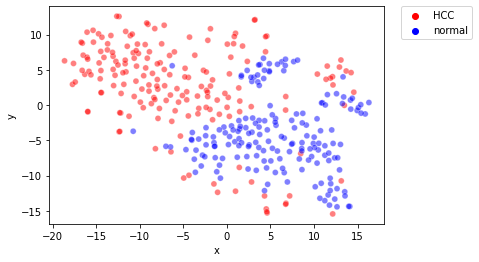

In [19]:
plot_data(X_embedded)


It is highly recommended to use another dimensionality reduction
method (e.g. PCA for dense data or TruncatedSVD for sparse data)
to reduce the number of dimensions to a reasonable amount (e.g. 50)
if the number of features is very high. This will suppress some
noise and speed up the computation of pairwise distances between
samples. For more tips see Laurens van der Maaten's FAQ [2]

[2] van der Maaten, L.J.P. t-Distributed Stochastic Neighbor Embedding
    https://lvdmaaten.github.io/tsne/

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pc = pca.fit_transform(X)

In [21]:
#initiate instance
X_embedded = TSNE(n_components=2, learning_rate='auto', random_state = 42, init='random')
#fit 
X_embedded = X_embedded.fit_transform(pc)
# produced an two dimension array with x,y features for every row, since n_components = 2
X_embedded.shape

(357, 2)

In [22]:
#X_embedded

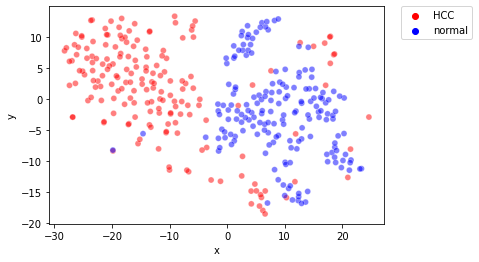

In [23]:
plot_data(X_embedded)

## Hypertuning the parameter

In [24]:
#read the documentation
TSNE?

## `perplexity`
Perplexity is a critical hyperparameter of tSNE. The author of tSNE, Laurens van der Maaten, mentions that typical values for the perplexity range between 5 and 50 (default 30). The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. A Rule of thumb is to use $N^{\frac{1}{2}}$

In [25]:
len(df)**(1/2)

18.894443627691185

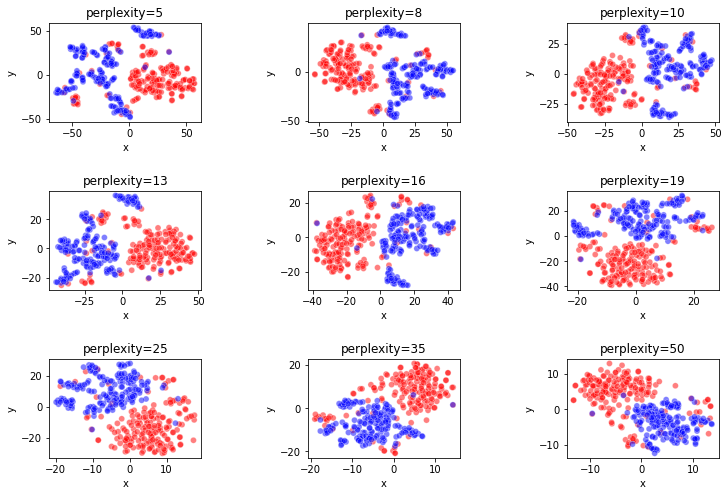

In [26]:
def plot_sub(X, df):
    #add x, y features to the original df
    df['x'] = X[:,0]
    df['y'] = X[:,1]
    ax = sns.scatterplot(x = 'x', y = 'y', hue = 'type', data = df, 
                         legend = False, alpha = 0.5, palette=['red', 'blue'])
    return ax

p = [5, 8, 10, 13, 16, 19, 25, 35, 50]
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity = p[i], random_state = 42)
    X_embedded = X_embedded.fit_transform(pc)
    plot_sub(X_embedded, df)
    ax.set_title(f'perplexity={p[i]}')
plt.show()

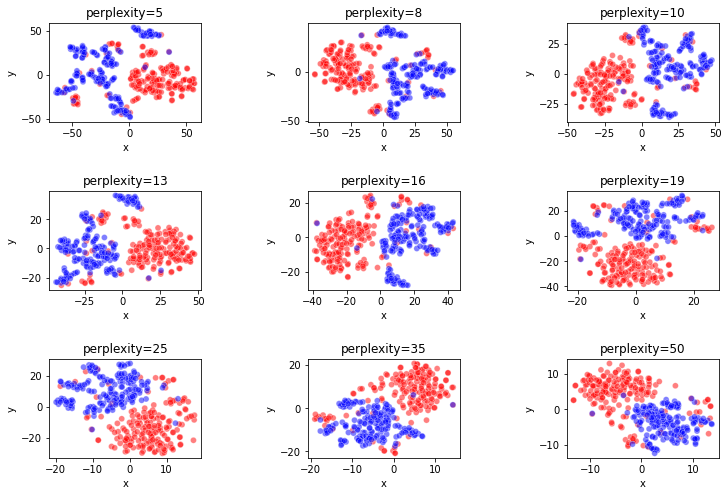

In [27]:
p = [5, 8, 10, 13, 16, 19, 25, 35, 50]
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity = p[i], random_state = 42)
    X_embedded = X_embedded.fit_transform(pc)
    plot_sub(X_embedded, df)
    ax.set_title(f'perplexity={p[i]}')
plt.show()


It seems that the perplexity of 19 gives the most clear seperation

## `method`

    method = 'barnes_hut'
is usely used in case of high number of observations. In our case we could use 

    method = 'exact'
However this will increase computation time (algorithm in O(N^2) time) more itterations, the slower it will be. 

In [28]:
#initiate instance
X_embedded = TSNE(n_components=2, 
                  learning_rate='auto', 
                  perplexity = 19, 
                  method='exact', 
                  random_state = 42, 
                  init='random')
#fit 
X_embedded = X_embedded.fit_transform(pc)
# produced an two dimension array with x,y features for every row, since n_components = 2
X_embedded.shape

(357, 2)

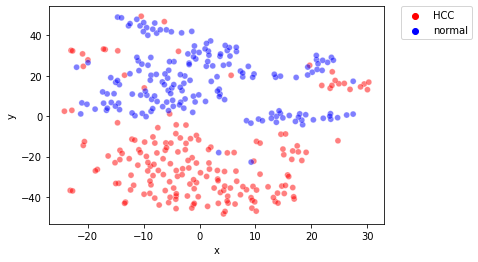

In [29]:
plot_data(X_embedded)


## `n_iter`
We learned that the number of itterations is of importance since in the t-distribution step it changes towards the optimal situation step by step. It should be at least 250. The more itterations, the more time however

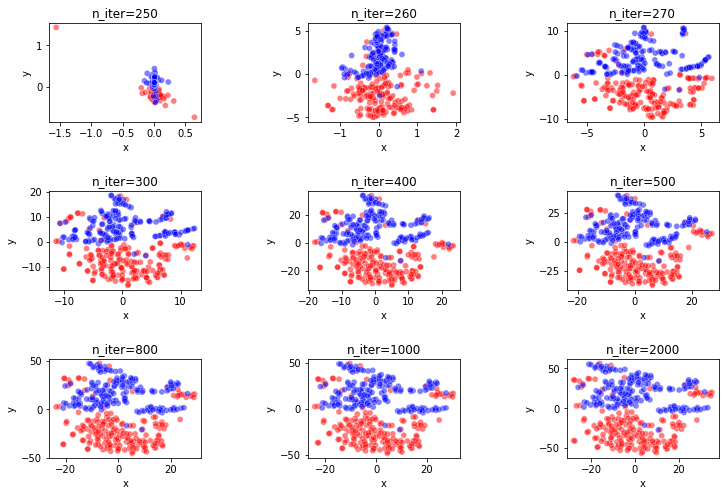

In [30]:

p = [250, 260, 270, 300, 400, 500, 800, 1000, 2000]
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(wspace=0.7, hspace=0.7)
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', 
                      perplexity = 19, 
                      random_state = 42, 
                      method = 'exact',
                      n_iter = p[i])
    X_embedded = X_embedded.fit_transform(pc)
    plot_sub(X_embedded, df)
    ax.set_title(f'n_iter={p[i]}')
plt.show()

Conclusion: there might be predicting value in the genes. We can see two almost seperated clusters the HCC and Normal, however, there are still overlapping colors. The visualization in two components x and y might nog capture all variation. 

# Exercise

Compare for the file Brain_GSE50161.csv the pca versus the tSNE, to be found at http://sbcb.inf.ufrgs.br/cumida
